In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt
%matplotlib inline

In [6]:
plt.rcParams['figure.figsize'] = [12., 8.]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 14

# Optimization Algorithms

In this notebook we will implement a few simple optimization algorithms, and explore more from the scipy.opt package on the 2d Rosenbrock test function

## Rosenbrock test function in 2d

The function in 2d is usually $f(x, y) = (a-x)^2 + b(y-x^2)^2$. Scipy provides this as a convenient function already, so we're going to use it and see how it looks like. It's minimum is at (1,1).

In [7]:
x = np.linspace(-1.5,2,300)
y = np.linspace(-2,3,300)

xx, yy = np.meshgrid(x, y)

f = opt.rosen([xx, yy])

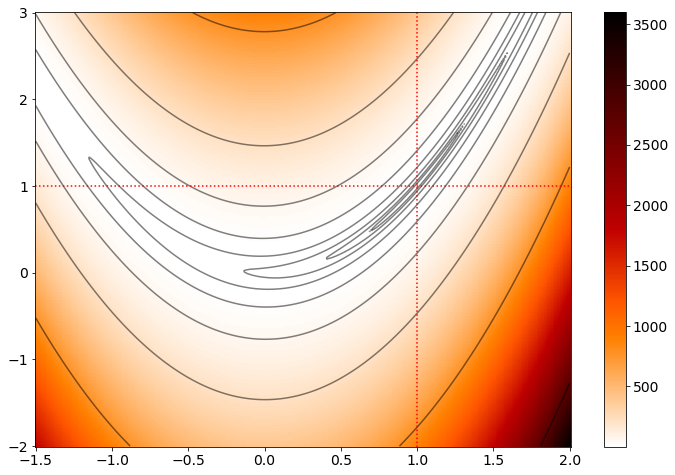

In [15]:
def plot(points=None, title=None, lines=True):
    pc = plt.pcolormesh(x, y, f, cmap='gist_heat_r', shading="nearest")
    plt.contour(x, y, f, levels=np.logspace(-1,4,10), colors='k', alpha=0.5)
    plt.colorbar(pc)
    plt.axvline(1, c='r', ls=':')
    plt.axhline(1, c='r', ls=':')
    if points is not None:
        plt.plot(points[:,0], points[:,1], '.-' if lines else '.',  c='k', lw=2)
    if title is not None:
        plt.gca().set_title(title)
plot()

## Naive Gradient descent

We start with the naive gradient descent algorithm as discussed in the lecture. Try out different alphas and see how it behaves.

In [16]:
def naive_gd(f, g, x0, alpha=0.001, iters=1000):
    '''Naive gradient descent'''
    x = [x0]
    for i in range(iters):
        grad = g(x[-1])
        x.append(x[-1] - alpha*grad)
    return x

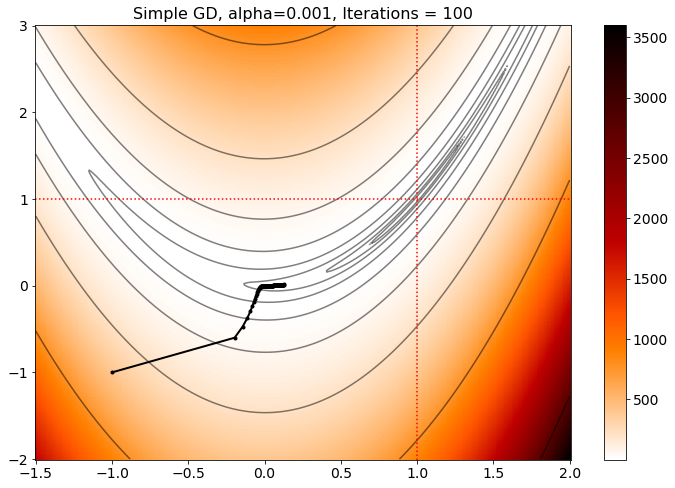

In [17]:
points = naive_gd(opt.rosen, opt.rosen_der, x0 = np.array([-1, -1]), alpha=0.001, iters=100)
plot(np.array(points), title='Simple GD, alpha=0.001, Iterations = 100')

## Newton Method

Using second derivatives, we can implement the Newton method, that then converges very fast!

In [18]:
def newton(f, g, h, x0):
    '''Newtown method'''
    x = [x0]
    for i in range(5):
        grad = g(x[-1])
        hess = h(x[-1])
        inv_hess = np.linalg.inv(hess)
        x.append(x[-1] - np.dot(inv_hess, grad))
    return x

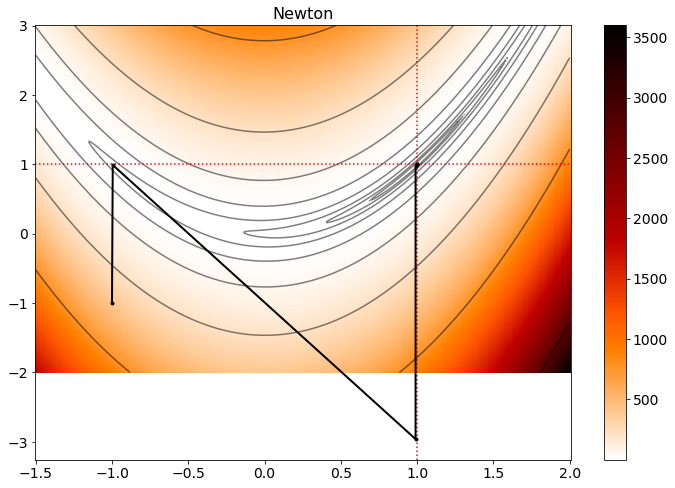

In [19]:
points = newton(opt.rosen, opt.rosen_der, opt.rosen_hess, x0 = np.array([-1, -1]))
plot(np.array(points), title='Newton')

## Nelder-Mead Simplex

Implement the Nelder-Mead Simplex algorithm yourself as an exercise and see how it performs

## Conjugate Gradient Descent

We can explore more optimization algorithms, that are provided via the scipy.opt package

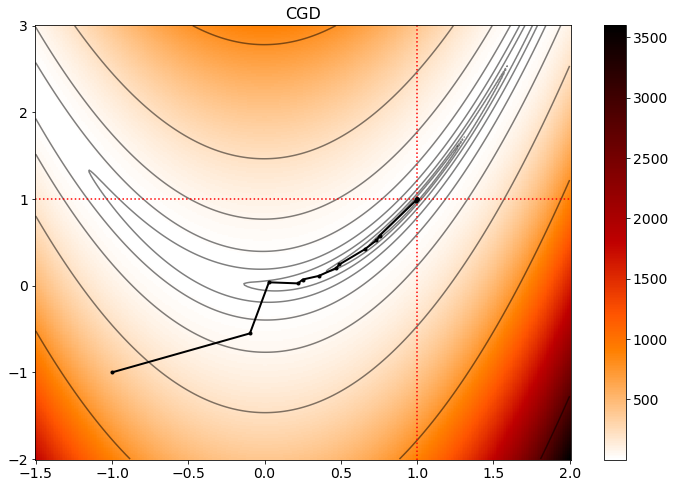

In [20]:
points = [[-1, -1]]
def callback(xk, *args, **kwargs):
    points.append(xk)
res = opt.minimize(opt.rosen, jac=opt.rosen_der, x0=points[0], method="CG", callback=callback)
plot(np.array(points), title='CGD')

## Genetic Algorithm

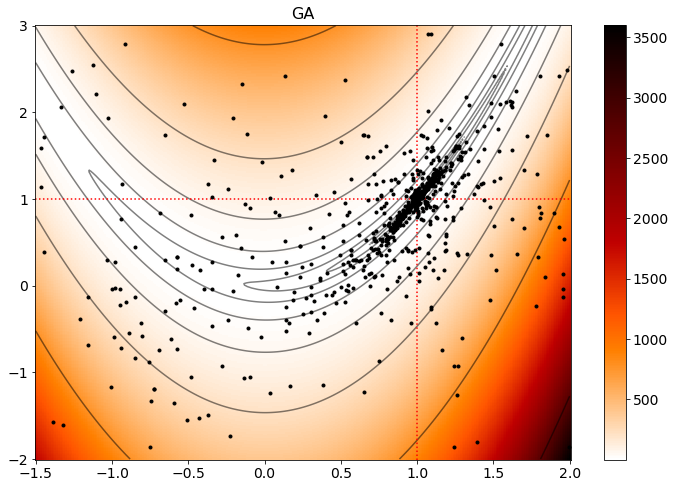

In [21]:
method='GA'
points = []
def r(x):
    points.append(x)
    return opt.rosen(x)
res = opt.differential_evolution(r, bounds=[[-1.5, 2], [-2,3]]) #, callback=callback)
plot(np.array(points), title='GA', lines=False)

## Exercise

Try out more algorithms and settings. Also, you could check out pother packages, such as NLopt